In [ ]:
!pip install torchtext==0.8.1

     |████████████████████████████████| 7.0 MB 4.6 MB/s 
     |████████████████████████████████| 776.8 MB 19 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.10.0
    Uninstalling torchtext-0.10.0:
      Successfully uninstalled torchtext-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu111 requires torch==1.9.0, but you have torch 1.7.1 which is incompatible.


In [ ]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/train_data_merged_labels.csv', header=0)


In [ ]:
df.head()

,utterances,Core Relations
0,who plays luke on star wars new hope,movie.starring.actor_movie.starring.character
1,show credits for the godfather,movie.starring.actor
2,who was the main actor in the exorcist,movie.starring.actor
3,who played dory on finding nemo,movie.starring.actor_movie.starring.character
4,who was the female lead in resident evil,actor.gender_movie.starring.actor


In [ ]:
from itertools import chain

unique_relations = []
for i in range(0,len(df['Core Relations'])):
  unique_relations.append(df['Core Relations'][i].rsplit('_',1))

unique_relations = list(set(list(chain.from_iterable( unique_relations ))))
print(unique_relations)
 # = chain.from_iterable( df['Core Relations'] )

['movie.directed_by', 'birth', 'movie.genre_movie.production', 'movie.production', 'companies', 'movie.directed_by_movie.initial_release', 'movie.genre_movie.initial_release', 'movie.language', 'movie.initial_release_date_movie.produced', 'movie.initial_release_date_movie.production', 'person.date_of', 'date', 'movie.initial_release_date', 'movie.country', 'movie.directed_by_movie.estimated', 'movie.starring.character', 'by', 'actor.gender', 'movie.estimated', 'none', 'revenue', 'movie.music', 'budget', 'movie.subjects', 'movie.production_companies', 'movie.starring.actor', 'movie.genre', 'movie.initial_release', 'movie.gross', 'movie.country_movie.genre', 'movie.country_movie.genre_movie.language', 'movie.locations', 'movie.directed_by_movie.produced', 'gr.amount_movie.gross', 'movie.rating', 'movie.directed', 'movie.genre_movie.gross', 'movie.produced', 'movie.produced_by_movie.production']


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


enc = preprocessing.LabelEncoder()
df['Encoded Relations'] = enc.fit_transform(df['Core Relations'])
df1 = df[['utterances','Encoded Relations']]
df1

,utterances,Encoded Relations
0,who plays luke on star wars new hope,42
1,show credits for the godfather,41
2,who was the main actor in the exorcist,41
3,who played dory on finding nemo,42
4,who was the female lead in resident evil,0
...,...,...
2248,revenue for titanic,26
2249,total titanic revenues,26
2250,what was the revenue for toy story 3,26
2251,dark knight revenue,26


In [ ]:
df2 = pd.read_csv('/content/test_data.csv', header=0)
df2

,utterances
0,star of thor
1,who is in the movie the campaign
2,list the cast of the movie the campaign
3,who was in twilight
4,who is in vulguria
...,...
976,trailer for star wars a new hope
977,show resident evil movies with trailers
978,can i see previews for upcoming warner brother...
979,how many woody allen movies are set in new yor...


In [ ]:
df1.to_csv('train.csv', index=False)

In [ ]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=True,
    tokenize='spacy',
    use_vocab=True,
    pad_first=True)
LABEL = ttd.Field(sequential=False, use_vocab=False, lower=True, is_target=True)

# Note: if you don't specify use_vocab=False, then PyTorch will
# complain later when you try to iterate over the dataset that
# the attribute `vocab` doesn't exist.

# Note 2: if you don't specify is_target=True, then PyTorch will
# assume it's part of the input, so when you iterate over the
# dataset it will be like:
# for (inputs, targets), _ in iterator:
# where the 2nd element (_) should have been the target.

dataset = ttd.TabularDataset(
    path='train.csv',
    format='csv',
    skip_header=True,
    fields=[('utterances', TEXT), ('Encoded Relations', LABEL)]
)

In [ ]:
dataset.fields

{'Encoded Relations': <torchtext.data.field.Field at 0x7f4889021a90>,
 'utterances': <torchtext.data.field.Field at 0x7f490d130bd0>}

In [ ]:
train_dataset, test_dataset = dataset.split(split_ratio=0.85) # default is 0.7

In [ ]:
len(train_dataset)

1915

In [ ]:
len(test_dataset)

338

In [ ]:
print(train_dataset[0].__dict__.keys())
print(train_dataset[0].__dict__.values())

dict_keys(['utterances', 'Encoded Relations'])
dict_values([['list', 'movies', 'rated', 'g'], '39'])


In [ ]:
TEXT.build_vocab(train_dataset,vectors = 'glove.6B.100d')
LABEL.build_vocab(train_dataset)

In [ ]:
len(LABEL.vocab)

47

In [ ]:
len(TEXT.vocab)

1064

In [ ]:
LABEL.vocab.freqs

In [ ]:
TEXT.vocab.vectors.size()

torch.Size([1064, 100])

In [ ]:
print(TEXT.vocab.vectors)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.2998,  0.0968,  0.7899,  ..., -0.1484, -0.1905,  0.1449],
        [-0.1194,  0.5419,  0.6217,  ..., -0.3805, -0.0422,  0.3516],
        [ 0.2783,  0.4995,  0.2494,  ..., -0.3274, -0.3004,  0.0930]])


In [ ]:
vocab = TEXT.vocab

In [ ]:
vocab.stoi

In [ ]:
vocab.itos

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
train_iter, test_iter = ttd.Iterator.splits(
        (train_dataset, test_dataset), sort_key=lambda x: len(x.utterances),
        batch_sizes=(32, 256), device=device)

/usr/local/lib/python3.7/dist-packages/torchtext/data/iterator.py:48: UserWarning: Iterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [ ]:
for inputs, targets in train_iter:
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


inputs: tensor([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,   13,  335,
          350,   32],
        [   1,    1,    1,    1,    1,    1,    1,   60,    6,  135,   71,  205,
           41,    3],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,   60,    3,
           21,  155],
        [   1,    1,    1,    1,    1,    1,    8,  225,    2,   54,   10,   72,
           14,   77],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,   11,   22,
           45,   46],
        [   1,    1,    1,    1,    1,    1,    1,    1,    8,   90,   20,    2,
            5,  214],
        [   1,    1,    1,    1,    1,    1,   15,   28,    2,    3,  288, 1027,
           51,  233],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,  748,
          662,    3],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,   11,
           20,  311],
        [   1,    1,    1,    1,    1,    1,    1,    1,    1,   

In [ ]:
for inputs, targets in test_iter:
  print("inputs:", inputs)
  print("targets:", targets)
  break

inputs: tensor([[ 11, 130,   0,  ...,   7,  45,  46],
        [ 11,  19,   2,  ...,   7,   2, 115],
        [ 12,  80,  16,  ...,  22,  82, 103],
        ...,
        [  1,   1,   1,  ...,   1,  13,  32],
        [  1,   1,   1,  ...,   1,  31,  62],
        [  1,   1,   1,  ...,   1, 563,  26]], device='cuda:0')
targets: tensor([42, 41,  9, 32, 39, 37, 39, 35,  2,  9, 27,  9, 27, 35, 41,  9, 27, 35,
         9,  9, 18, 39,  9,  8, 32, 41, 45, 41, 37,  2, 44, 41, 37, 37, 31, 35,
        35, 19, 45, 18, 35,  6, 45, 35, 42, 41, 19, 35, 39,  9,  9, 32,  9,  9,
        18,  9,  9, 31, 18, 35, 32, 16, 27, 41,  9, 35, 32,  9,  9, 18, 35, 30,
         9, 29,  9, 35, 35, 35,  9, 35,  2, 35, 37,  9,  9, 39, 19, 44, 45,  0,
        19,  9, 44,  6, 19, 45, 35, 45, 27,  9, 45,  2, 44,  9,  9, 45, 41, 39,
        32, 27, 39, 45, 35, 39,  9, 35, 19, 37, 27, 44, 27, 45, 39, 39, 32,  9,
        45, 45,  6,  9, 19,  2, 44, 19, 39, 39, 39, 41,  9, 32, 19, 37,  9, 38,
        41, 37, 27, 41,  9, 39,  9, 

/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [ ]:
# Define the model
class RNN(nn.Module):
  def __init__(self, input_dim, embed_dim, hidden_dim, output_dim):
    super(RNN, self).__init__()
    self.V = input_dim
    self.D = embed_dim
    self.M = hidden_dim
    self.K = output_dim
    self.L = 1 # number of rnn layers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBED_DIM = 300
HIDDEN_DIM = 50
OUTPUT_DIM = 1


model = RNN(INPUT_DIM, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)
model.to(device)

RNN(
  (embed): Embedding(1064, 300)
  (rnn): LSTM(300, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_iter:
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      # inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_iter:
      # inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 100)

/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch 1/100, Train Loss: -48.8750,       Test Loss: -107.0744, Duration: 0:00:00.324878
Epoch 2/100, Train Loss: -162.8596,       Test Loss: -214.6392, Duration: 0:00:00.314395
Epoch 3/100, Train Loss: -254.1755,       Test Loss: -301.0686, Duration: 0:00:00.318232
Epoch 4/100, Train Loss: -337.8678,       Test Loss: -384.5573, Duration: 0:00:00.312043
Epoch 5/100, Train Loss: -420.6319,       Test Loss: -468.5520, Duration: 0:00:00.305156
Epoch 6/100, Train Loss: -503.5656,       Test Loss: -551.0891, Duration: 0:00:00.306331
Epoch 7/100, Train Loss: -584.3609,       Test Loss: -631.7530, Duration: 0:00:00.294520
Epoch 8/100, Train Loss: -664.0640,       Test Loss: -711.2124, Duration: 0:00:00.331480
Epoch 9/100, Train Loss: -742.8612,       Test Loss: -790.4912, Duration: 0:00:00.296186
Epoch 10/100, Train Loss: -820.5977,       Test Loss: -868.5500, Duration: 0:00:00.300319
Epoch 11/100, Train Loss: -897.8443,       Test Loss: -946.8452, Duration: 0:00:00.310318
Epoch 12/100, Train 

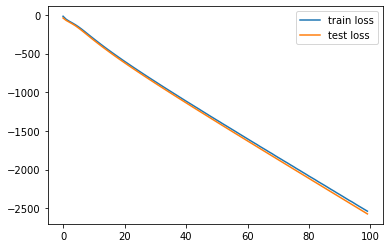

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9941, Test acc: 0.9617
